<a href="https://colab.research.google.com/github/napaphach/credit-scoring/blob/main/Data_Science__Credit_Scoring_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

# Package Import and Configuration

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.metrics import classification_report, mean_squared_error, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.model_selection import cross_validate, TimeSeriesSplit
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Logistic Regression

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/napaphach/credit-scoring/main/credit-scoring.csv")
X, y = data[["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse", 
             "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", 
             "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]], data["SeriousDlqin2yrs"]

In [29]:
pipeline = make_pipeline(
    make_column_transformer(
        (make_pipeline(
            MinMaxScaler(),
        ), ["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse", 
             "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", 
             "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]),
    remainder="passthrough"),
    
    SGDClassifier(loss="log", random_state=1909, eta0=0.1),
)
pipeline = pipeline.fit(X, y)

ValueError: ignored

In [ ]:
cv = cross_validate(estimator=pipeline, X=X, y=y, scoring=["f1", "recall", "precision", "accuracy"], cv=10, n_jobs=-1, return_train_score=True, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [ ]:
print(f"Accuracy (Tr/Te): {np.mean(cv['train_accuracy']) * 100:.2f}%/{np.mean(cv['test_accuracy']) * 100:.2f}%")
print(f"Recall (Tr/Te): {np.mean(cv['train_recall']) * 100:.2f}%/{np.mean(cv['test_recall']) * 100:.2f}%")
print(f"Precision (Tr/Te): {np.mean(cv['train_precision']) * 100:.2f}%/{np.mean(cv['test_precision']) * 100:.2f}%")
print(f"F1 (Tr/Te): {np.mean(cv['train_f1']) * 100:.2f}%/{np.mean(cv['test_f1']) * 100:.2f}%")

Accuracy (Tr/Te): 88.00%/90.00%
Recall (Tr/Te): 93.33%/94.33%
Precision (Tr/Te): 86.48%/90.12%
F1 (Tr/Te): 89.60%/90.92%


In [ ]:
print(f"Accuracy (Tr/Te): {np.mean(cv['train_accuracy']) * 100:.2f}%/{np.mean(cv['test_accuracy']) * 100:.2f}%")
print(f"Recall (Tr/Te): {np.mean(cv['train_recall']) * 100:.2f}%/{np.mean(cv['test_recall']) * 100:.2f}%")
print(f"Precision (Tr/Te): {np.mean(cv['train_precision']) * 100:.2f}%/{np.mean(cv['test_precision']) * 100:.2f}%")
print(f"F1 (Tr/Te): {np.mean(cv['train_f1']) * 100:.2f}%/{np.mean(cv['test_f1']) * 100:.2f}%")

Accuracy (Tr/Te): 88.00%/90.00%
Recall (Tr/Te): 93.33%/94.33%
Precision (Tr/Te): 86.48%/90.12%
F1 (Tr/Te): 89.60%/90.92%


In [ ]:
print(classification_report(y, pipeline.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71        45
           1       0.73      1.00      0.85        55

    accuracy                           0.80       100
   macro avg       0.87      0.78      0.78       100
weighted avg       0.85      0.80      0.79       100



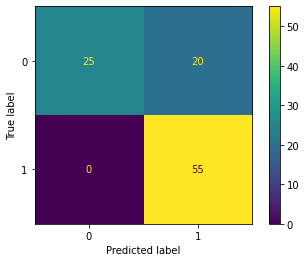

In [ ]:
plot_confusion_matrix(pipeline, X, y)

In [ ]:
prediction = pd.DataFrame({"hours_studied": [4], "hours_slept": [8.8]})

In [ ]:
pipeline.predict(prediction)

array([1])

In [ ]:
pipeline.predict_proba(prediction)

array([[0.47564816, 0.52435184]])

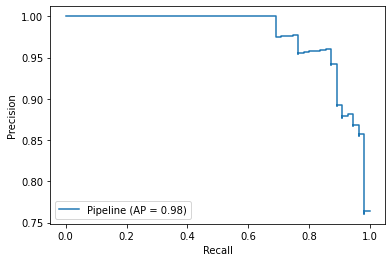

In [ ]:
plot_precision_recall_curve(pipeline, X, y)